
    Использовать dataset MovieLens
    Построить рекомендации (регрессия, предсказываем оценку) на фичах:

    TF-IDF на тегах и жанрах
    Средние оценки (+ median, variance, etc.) пользователя и фильма

    Оценить RMSE на тестовой выборке



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm

In [2]:
links = pd.read_csv('ml-latest/links.csv')
movies = pd.read_csv('ml-latest/movies.csv')
ratings = pd.read_csv('ml-latest/ratings.csv')
tags = pd.read_csv('ml-latest/tags.csv')

In [3]:
# movies.head()
ratings.head()
# links.head()
# tags.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


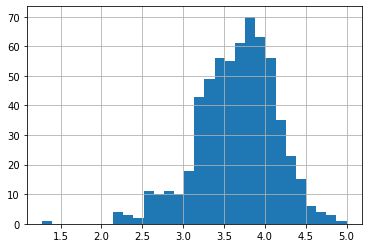

In [4]:
ratings.groupby('userId').rating.mean().hist(bins=30)

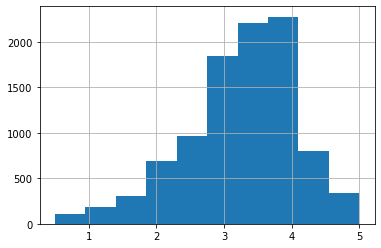

In [5]:
ratings.groupby('movieId').rating.mean().hist(bins=10)

In [6]:
df = ratings.copy().drop('timestamp', axis=1)

In [7]:
# df['userId_average_rating'] = ratings.userId.apply(lambda x: ratings.groupby('userId').rating.mean().loc[x])

#не дождался окончания работы, вышел очень дорогой вариант

### Средние оценки (+ median, variance, etc.) пользователя

In [8]:
userId_average_rating = ratings.groupby('userId').rating.mean().round(2)

In [9]:
df = df.merge(userId_average_rating, how='left', left_on='userId', right_index=True, suffixes=('', '_average_for_userid'))

In [10]:
userId_median_rating = ratings.groupby('userId').rating.median().round(2)

In [11]:
df = df.merge(userId_median_rating, how='left', left_on='userId', right_index=True, suffixes=('', '_median_for_userid'))

In [12]:
userId_variance_rating = ratings.groupby('userId').rating.var().round(2)

In [13]:
df = df.merge(userId_variance_rating, how='left', left_on='userId', right_index=True, suffixes=('', '_variance_for_userid'))

In [14]:
df.tail()

,userId,movieId,rating,rating_average_for_userid,rating_median_for_userid,rating_variance_for_userid
100831,610,166534,4.0,3.69,3.5,0.74
100832,610,168248,5.0,3.69,3.5,0.74
100833,610,168250,5.0,3.69,3.5,0.74
100834,610,168252,5.0,3.69,3.5,0.74
100835,610,170875,3.0,3.69,3.5,0.74


### Средние оценки (+ median, variance, etc.) фильма

In [15]:
movieId_average_rating = ratings.groupby('movieId').rating.mean().round(2)

In [16]:
df = df.merge(movieId_average_rating, how='left', left_on='movieId', right_index=True, suffixes=('', '_average_for_movieId'))

In [17]:
movieId_median_rating = ratings.groupby('movieId').rating.median().round(2)

In [18]:
df = df.merge(movieId_median_rating, how='left', left_on='movieId', right_index=True, suffixes=('', '_median_for_movieId'))

In [19]:
movieId_variance_rating = ratings.groupby('movieId').rating.var().round(2)

In [20]:
df = df.merge(movieId_variance_rating, how='left', left_on='movieId', right_index=True, suffixes=('', '_variance_for_movieId'))

In [21]:
df.rating_variance_for_movieId = df.rating_variance_for_movieId.fillna(0)

In [22]:
# df.info()
df.tail()

,userId,movieId,rating,rating_average_for_userid,rating_median_for_userid,rating_variance_for_userid,rating_average_for_movieId,rating_median_for_movieId,rating_variance_for_movieId
100831,610,166534,4.0,3.69,3.5,0.74,3.33,4.0,2.47
100832,610,168248,5.0,3.69,3.5,0.74,4.14,4.0,0.56
100833,610,168250,5.0,3.69,3.5,0.74,3.63,4.0,0.95
100834,610,168252,5.0,3.69,3.5,0.74,4.28,4.5,0.42
100835,610,170875,3.0,3.69,3.5,0.74,2.33,3.0,1.33


### TF-IDF на тегах и жанрах

In [23]:
df = df.merge(movies,how='left', left_on='movieId',right_on='movieId').drop('title', axis=1)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [26]:
df['genres'] = df.genres.apply(change_string)

In [27]:
df = df.merge(tags,how='left', left_on=['userId','movieId'],right_on=['userId','movieId']).drop('timestamp', axis=1)

In [28]:
df['tag'] = df.tag.fillna('')

In [29]:
df.tail()

,userId,movieId,rating,rating_average_for_userid,rating_median_for_userid,rating_variance_for_userid,rating_average_for_movieId,rating_median_for_movieId,rating_variance_for_movieId,genres,tag
102672,610,166534,4.0,3.69,3.5,0.74,3.33,4.0,2.47,Drama Horror Thriller,
102673,610,168248,5.0,3.69,3.5,0.74,4.14,4.0,0.56,Action Crime Thriller,Heroic Bloodshed
102674,610,168250,5.0,3.69,3.5,0.74,3.63,4.0,0.95,Horror,
102675,610,168252,5.0,3.69,3.5,0.74,4.28,4.5,0.42,Action SciFi,
102676,610,170875,3.0,3.69,3.5,0.74,2.33,3.0,1.33,Action Crime Drama Thriller,


In [30]:
# genre_vectoriser = TfidfVectorizer()
# genre_features = genre_vectoriser.fit_transform(df.genres)

In [31]:
# tag_vectoriser = TfidfVectorizer()
# tag_features = tag_vectoriser.fit_transform(df.tag)

In [32]:
# !pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

In [33]:
X = df.drop('rating', axis=1)
y = df.rating

In [34]:
mapper = DataFrameMapper([
     ('genres', TfidfVectorizer()),
     ('tag', TfidfVectorizer()),
     (['userId', 'movieId', 'rating_average_for_userid',
       'rating_median_for_userid', 'rating_variance_for_userid',
       'rating_average_for_movieId', 'rating_median_for_movieId',
       'rating_variance_for_movieId'], None)
 ], df_out=True)

In [35]:
features = mapper.fit_transform(X)

In [51]:
features.head()

,genres_action,genres_adventure,genres_animation,genres_children,genres_comedy,genres_crime,genres_documentary,genres_drama,genres_fantasy,genres_filmnoir,...,tag_zombies,tag_zooey,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_0,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_1,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_2,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_3,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_4,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_5,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_6,userId_movieId_rating_average_for_userid_rating_median_for_userid_rating_variance_for_userid_rating_average_for_movieId_rating_median_for_movieId_rating_variance_for_movieId_7
0,0.000000,0.363997,0.548865,0.509129,0.292063,0.000000,0.0,0.0,0.470894,0.0,...,0.0,0.0,1.0,1.0,4.37,5.0,0.64,3.92,4.0,0.70
1,0.000000,0.000000,0.000000,0.000000,0.582835,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,3.0,4.37,5.0,0.64,3.26,3.0,1.11
2,0.516958,0.000000,0.000000,0.000000,0.000000,0.656650,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,6.0,4.37,5.0,0.64,3.95,4.0,0.67
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,47.0,4.37,5.0,0.64,3.98,4.0,0.85
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.547452,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,50.0,4.37,5.0,0.64,4.24,4.5,0.64


In [37]:
features.shape
# y.shape

(102677, 1736)

### Построить рекомендации (регрессия, предсказываем оценку)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_rg = RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [42]:
rf_rg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [43]:
predictions = rf_rg.predict(X_test)

### Оценить RMSE на тестовой выборке

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
np.sqrt(mean_squared_error(y_test, predictions))

0.799547737292679

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso = Lasso(alpha = 0.1)

In [48]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [49]:
predictions_lasso = lasso.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test, predictions_lasso))

0.8506361636649563